In [130]:
"""work with yachtworld.com data from YwspiderSpider"""

import re
import json
import matplotlib.pyplot
import pandas
import numpy

def rand_jitter(arr):
    """helper function to add jitter to scatter plots"""
    stdev = .01 * (max(arr) - min(arr))
    return arr + numpy.random.randn(len(arr)) * stdev

with open('/Users/ntaylor/Downloads/yw/yachts.json', 'r') as f:
    yachts = json.load(f)


In [ ]:
df = pandas.DataFrame([
        [
            yacht['name'][0],
            re.sub("\D", "", yacht['price']),
            yacht['length'][0][:2],
            yacht['length'][-1],
            yacht['location'][-1]
        ] for yacht in yachts
    ],
    columns = ['name', 'price', 'length', 'year', 'country']
)

df['age_bucket'] = df['age'].astype('float')//25

In [19]:
for yacht in yachts[:10]:
    name, price, length, location = yacht['name'], yacht['price'], yacht['length'], yacht['location']
    print(name[0], re.sub("\D", "", price), length[0][:2], length[-1], location[-1])

Custom Merani ALISEO 608 31 1965 Italy
Custom Mangalore - India Yawl al Terzo WOOD 729 36 1998 Italy
Dolphin 24 sloop 950 24 1967 United States
O'Day 25 STD 1500 25 1982 United States
Bee Arrow 1500 18 1985 United States
Albin Viggen 1520 23 1971 Ireland
Optimist Sailing Dinghy 1939 7  2017 Spain
Ericson 30+ 2000 30 1980 United States
Mirage M 24 2000 24 1973 United States
C&C Shark 2000 24 1975 United States


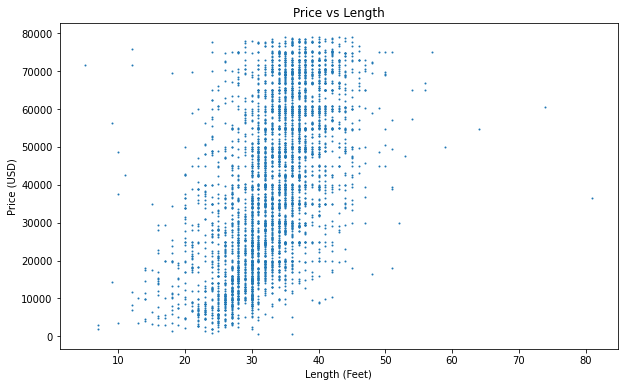

In [40]:
fig = matplotlib.pyplot.figure(figsize=(10, 6))
matplotlib.pyplot.title(f"Price vs Length")
matplotlib.pyplot.xlabel('Length (Feet)')
matplotlib.pyplot.ylabel('Price (USD)')
s = matplotlib.pyplot.plot(
    [int(y['length'][0][:2]) for y in yachts[:]],
    [int(re.sub("\D", "", y['price'])) for y in yachts[:]],
    marker=".",
    linestyle="None",
    markersize=2
)

[]

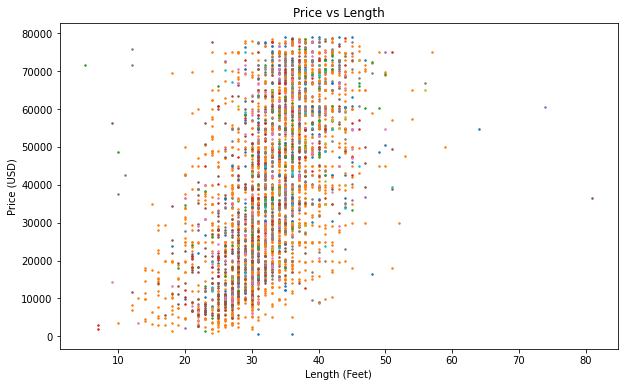

In [131]:
fig = matplotlib.pyplot.figure(figsize=(10, 6))
axes = matplotlib.pyplot.subplot()
matplotlib.pyplot.title(f"Price vs Length")
matplotlib.pyplot.xlabel('Length (Feet)')
matplotlib.pyplot.ylabel('Price (USD)')
for country in list(df['country'].unique()):
    c = df.loc[df['country'] == country]
    axes.plot(c['length'].astype('int32'), c['price'].astype('int32'), label=country, marker=".", linestyle="None", markersize=3)
matplotlib.pyplot.plot(data=axes)

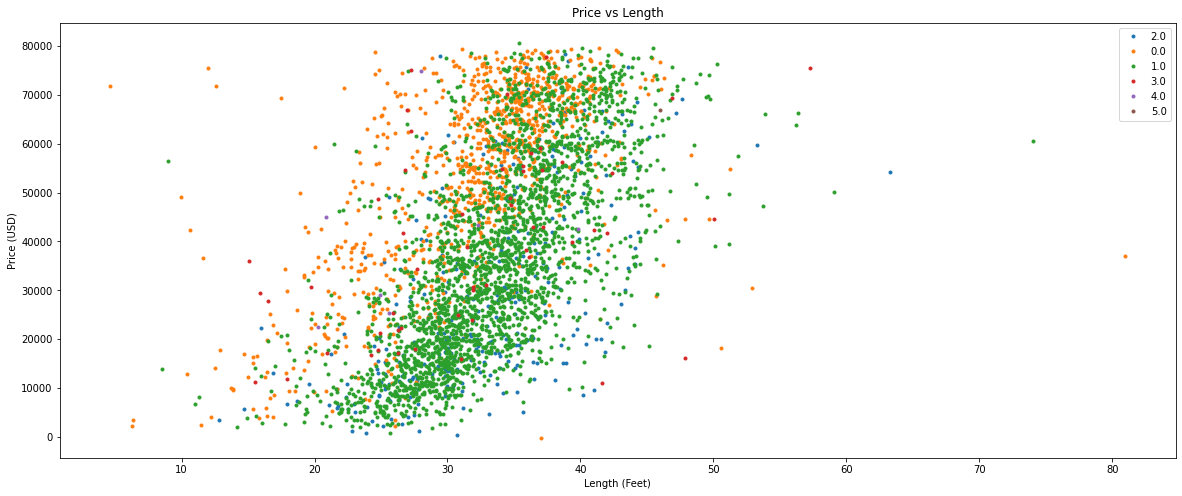

In [124]:
fig = matplotlib.pyplot.figure(figsize=(20, 8))
axes = matplotlib.pyplot.subplot()
matplotlib.pyplot.title(f"Price vs Length")
matplotlib.pyplot.xlabel('Length (Feet)')
matplotlib.pyplot.ylabel('Price (USD)')
for age in list(df['age_bucket'].unique()):
    c = df.loc[df['age_bucket'] == age]
    axes.plot(rand_jitter(c['length'].astype('int32')), rand_jitter(c['price'].astype('int32')), label=age, marker=".", linestyle="None")
matplotlib.pyplot.legend()